Pneumonia detection with ResNet50

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [8]:
class_names = ['NORMAL', 'PNEUMONIA']
nb_classes = len(class_names)
image_size = (220,220)

In [9]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob
def load_data():

    datasets = ["/content/drive/MyDrive/train","/content/drive/MyDrive/Colab Notebooks/test"]
    images = []
    labels = []

    count =0
    for dataset in datasets:

        for folder in os.listdir(dataset):

            if folder in ['NORMAL']: label = 0
            elif folder in ['PNEUMONIA']: label = 1

            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                img_path = os.path.join(os.path.join(dataset, folder), file)

                image = cv2.imread(img_path)
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                try:
                    image = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)
                except:
                    continue
                images.append(image)
                labels.append(label)
            print()

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [10]:
images, labels = load_data()

100%|██████████| 84/84 [00:07<00:00, 10.92it/s]


100%|██████████| 2210/2210 [00:55<00:00, 39.78it/s]


100%|██████████| 390/390 [00:09<00:00, 43.23it/s]


100%|██████████| 234/234 [00:11<00:00, 20.09it/s]


In [11]:
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.23)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [12]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]
print("Number of coaching copies: {}".format(n_train))
print("Number of validated copies: {}".format(n_val))
print("Number of test copies: {}".format(n_test))

print("Training sample form: {}".format(train_images.shape))
print("Training image value form: {}".format(train_labels.shape))
print("Validation sample form: {}".format(val_images.shape))
print("Form of validation image values: {}".format(val_labels.shape))
print("Test sample form: {}".format(test_images.shape))
print("Test image value form: {}".format(test_labels.shape))

Number of coaching copies: 2246
Number of validated copies: 336
Number of test copies: 336
Training sample form: (2246, 220, 220, 3)
Training image value form: (2246,)
Validation sample form: (336, 220, 220, 3)
Form of validation image values: (336,)
Test sample form: (336, 220, 220, 3)
Test image value form: (336,)


Preproccesing

normalization of data

In [13]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

Visualization of some images

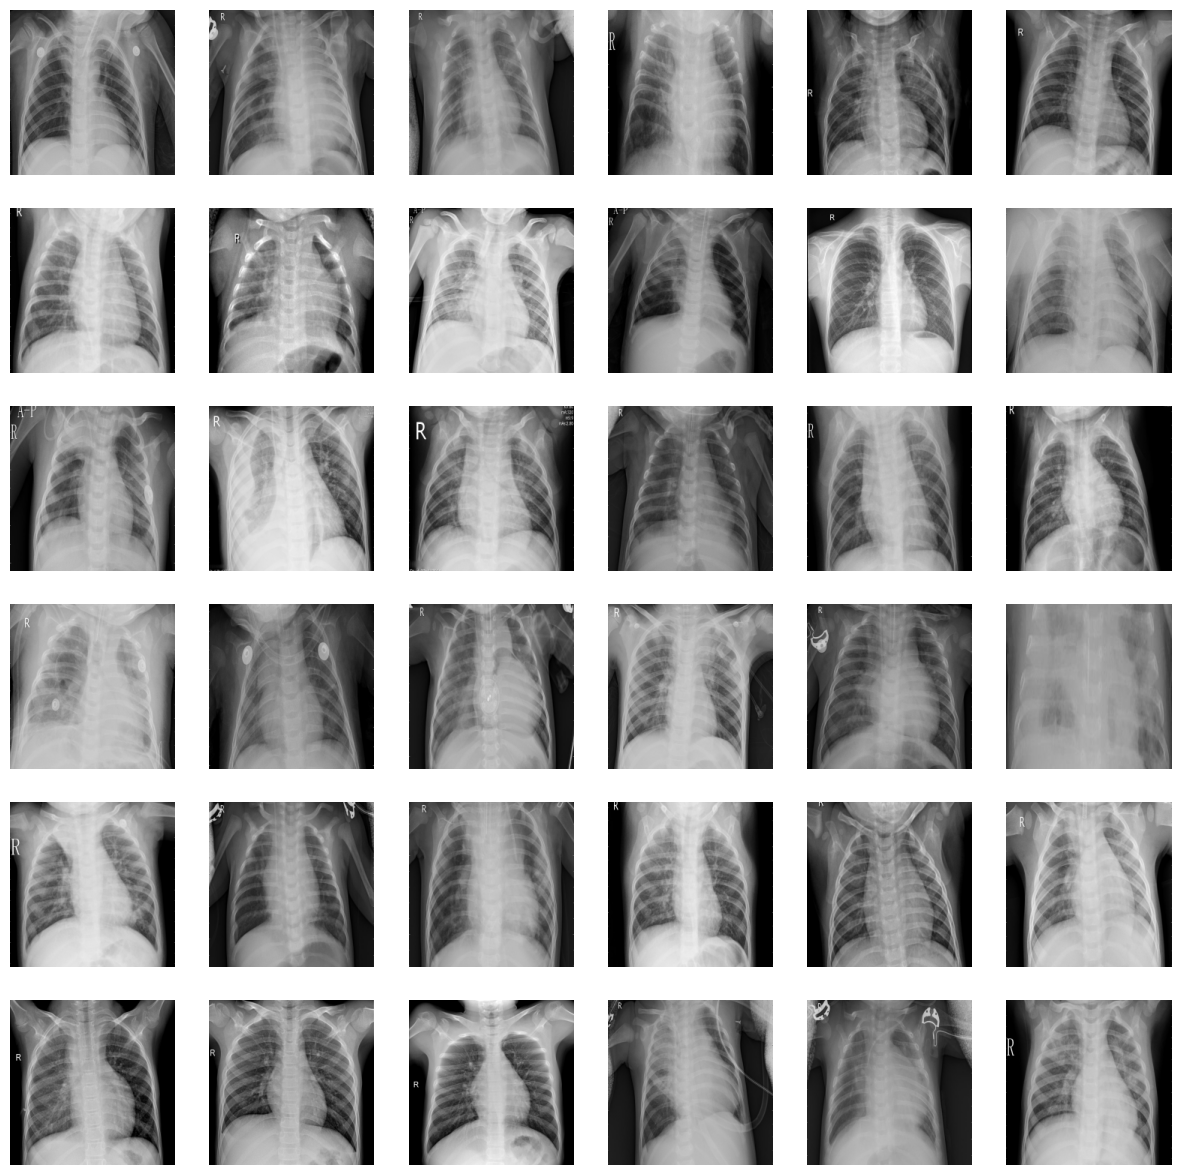

In [14]:
plt.figure(figsize=(15,15))
for n,i in enumerate(list(np.random.randint(0,len(train_images),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])
    plt.axis("off")

**modeling**

ResNet50

In [15]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

94668760/94668760 [==============================] - 1s 0us/step


build a model

In [16]:
model = Sequential()

model.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False

model.add(Flatten())

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = "sigmoid"))

In [17]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36410113 (138.89 MB)
Trainable params: 12845313 (49.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


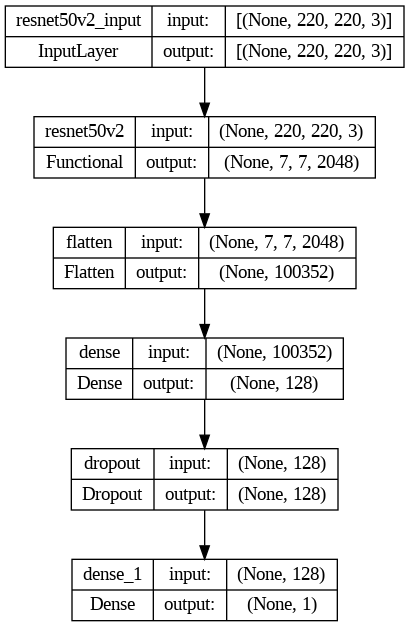

In [18]:
tf.keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

**training a model**

In [19]:
istory = model.fit(
    x = train_images,
    y = train_labels,
    batch_size = 16,
    epochs = 10,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
141/141 [==============================] - 501s 4s/step - loss: 1.2945 - accuracy: 0.9092 - val_loss: 0.2237 - val_accuracy: 0.9375
Epoch 2/10
141/141 [==============================] - 481s 3s/step - loss: 0.1573 - accuracy: 0.9421 - val_loss: 0.1450 - val_accuracy: 0.9464
Epoch 3/10
141/141 [==============================] - 453s 3s/step - loss: 0.1125 - accuracy: 0.9519 - val_loss: 0.1467 - val_accuracy: 0.9524
Epoch 4/10
141/141 [==============================] - 482s 3s/step - loss: 0.1152 - accuracy: 0.9546 - val_loss: 0.1857 - val_accuracy: 0.9464
Epoch 5/10
141/141 [==============================] - 522s 4s/step - loss: 0.1006 - accuracy: 0.9622 - val_loss: 0.1672 - val_accuracy: 0.9583
Epoch 6/10
141/141 [==============================] - 488s 3s/step - loss: 0.0893 - accuracy: 0.9679 - val_loss: 0.1534 - val_accuracy: 0.9554
Epoch 7/10
141/141 [==============================] - 486s 3s/step - loss: 0.0484 - accuracy: 0.9822 - val_loss: 0.1923 - val_accuracy: 0.9613

Evaluation of the model

In [20]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

11/11 [==============================] - 62s 5s/step - loss: 0.1524 - accuracy: 0.9673
Accuracy on test data: 96.73%


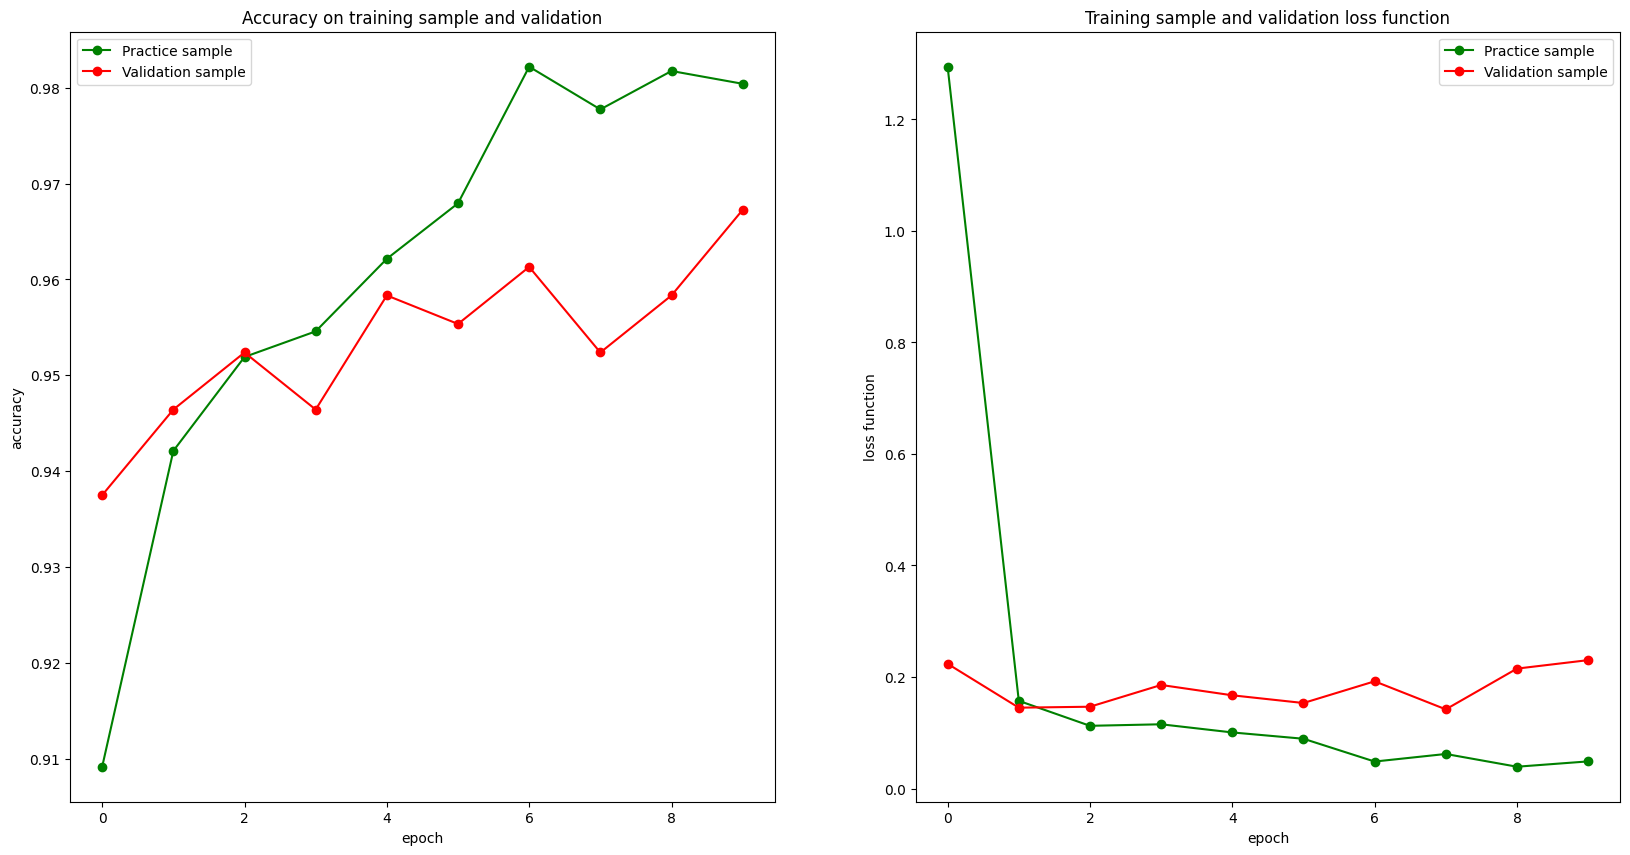

In [21]:
history = istory
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Practice sample')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation sample')
ax[0].set_title('Accuracy on training sample and validation')
ax[0].legend()
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Practice sample ')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation sample')
ax[1].set_title('Training sample and validation loss function')
ax[1].legend()
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("loss function")
plt.show()

real classlabel: PNEUMONIA
11/11 [==============================] - 60s 5s/step
Predicted class: PNEUMONIA 



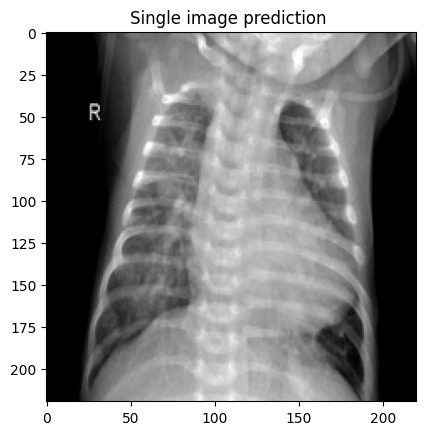

In [22]:
first_image = test_images[0]
first_label = test_labels[0]

plt.title("Single image prediction ")
plt.imshow(first_image)
print("real classlabel:",class_names[first_label])

predictions = model.predict(test_images)
print("Predicted class:",class_names[int(np.ceil(predictions[0]))], '\n')

In [31]:
model.save('our_model.h5')

In [74]:
training_data = '/content/drive/MyDrive/train'
testing_data = '/content/drive/MyDrive/Colab Notebooks/test'

In [75]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

training_dataset = train_datagen.flow_from_directory(
    directory=training_data,
    shuffle=True,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
    )
validation_dataset = train_datagen.flow_from_directory(
    directory=training_data,
    shuffle=True,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
    )

Found 1836 images belonging to 2 classes.
Found 458 images belonging to 2 classes.


In [69]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.applications import ResNet50V2
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import warnings


In [72]:
model = load_model('our_model.h5')
target_size = (220, 220)
batch_size = 16
test_datagen = ImageDataGenerator(rescale=1./255)
testing = test_datagen.flow_from_directory(
    directory=testing_data,
    shuffle=True,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="binary"
    )

evaluate = model.evaluate(testing, steps=testing.n//batch_size, verbose=1)

print("Precision on the test set: {}".format(evaluate[1]))

Found 624 images belonging to 2 classes.
39/39 [==============================] - 126s 3s/step - loss: 0.1751 - accuracy: 0.9696
Precision on the test set: 0.9695512652397156


In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

training_dataset = train_datagen.flow_from_directory(
    directory=training_data,
    shuffle=True,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
    )
validation_dataset = train_datagen.flow_from_directory(
    directory=training_data,
    shuffle=True,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
    )

Found 1836 images belonging to 2 classes.
Found 458 images belonging to 2 classes.


In [77]:
train_images, train_labels = next(training_dataset)
label_names = {
    0: "Normal",
    1: "Pneumonia"
}

In [80]:
prediction = []
original = []
image = []
threshold = 0.5

for label in training_dataset.class_indices:
    folder_path = os.path.join(testing_data, label)
    for item in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, item))
        img = cv2.resize(img, target_size)
        image.append(img)
        img = img/255
        img = img.reshape(-1, *target_size, 3)
        predict = (model.predict(img, verbose=0)[0][0] > threshold).astype("int32")
        prediction.append(predict)
        original.append(training_dataset.class_indices[label])

100%|██████████| 390/390 [01:49<00:00,  3.56it/s]


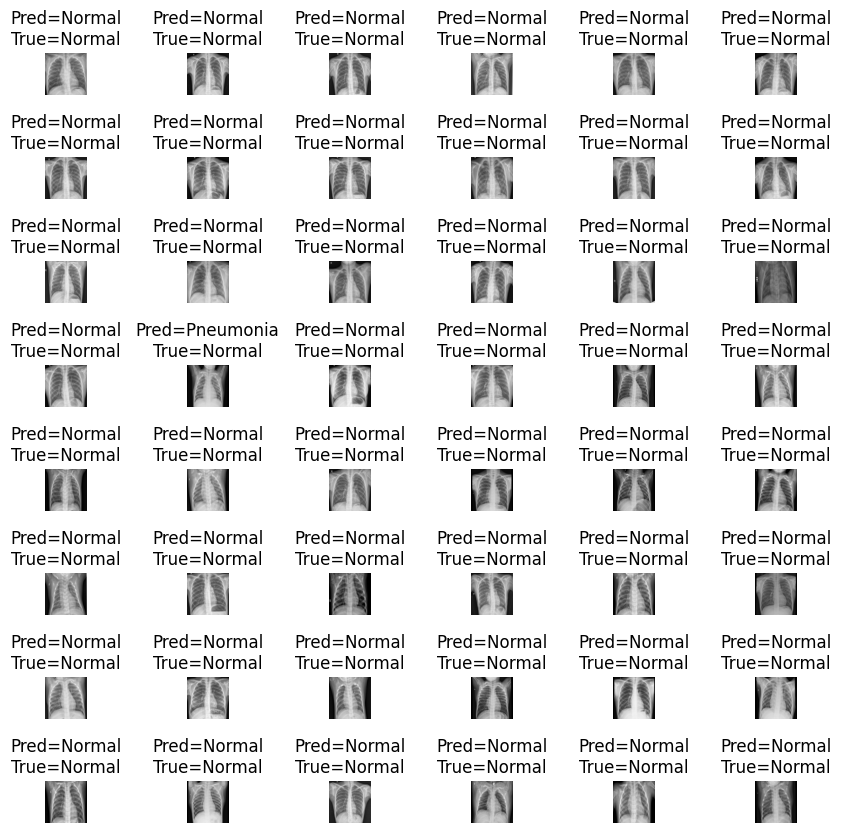

In [81]:
L = 8
W = 6

fig, axes = plt.subplots(L, W, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(L*W):
    axes[i].imshow(image[i])
    pred_label = label_names[prediction[i]]
    true_label = label_names[original[i]]
    axes[i].set_title("Pred={}\nTrue={}".format(pred_label, true_label))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1.2, hspace=1.5)

In [38]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = load_model('our_model.h5')  # Loading our model
img = image.load_img('/content/drive/MyDrive/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(220, 220))
imagee = image.img_to_array(img)  # Converting the X-Ray into pixels
imagee = np.expand_dims(imagee, axis=0)
img_data = preprocess_input(imagee)
prediction = model.predict(img_data)

# Assuming binary classification
prediction_value = prediction[0][0]

if prediction_value > 0.5:  # Adjust the threshold based on your model and problem
    print('Person is affected with Pneumonia.')
else:
    print('Person is safe.')

print(f'Prediction Value: {prediction_value}')


1/1 [==============================] - 2s 2s/step
Person is affected with Pneumonia.
Prediction Value: 1.0


In [82]:
print(classification_report(original, prediction, target_names=["Pneumonia", "Normal"]))

              precision    recall  f1-score   support

   Pneumonia       1.00      0.92      0.96       234
      Normal       0.96      1.00      0.98       390

    accuracy                           0.97       624
   macro avg       0.98      0.96      0.97       624
weighted avg       0.97      0.97      0.97       624



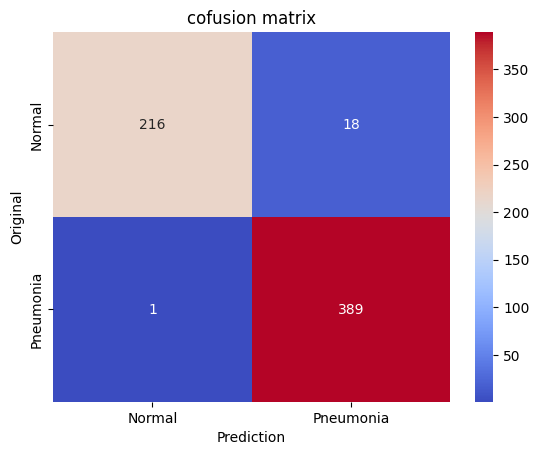

In [83]:
cm = confusion_matrix(original, prediction)
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax, fmt=".0f", cmap="coolwarm")
ax.set_xticklabels(list(label_names.values()))
ax.set_yticklabels(list(label_names.values()))
ax.set_xlabel("Prediction")
ax.set_ylabel("Original")
ax.set_title("cofusion matrix")
plt.show()

In [84]:
fpr, tpr, _ = roc_curve(original, prediction)
auc_score = roc_auc_score(original, prediction).round(4)
print("AUC: ", auc_score)

AUC:  0.9603


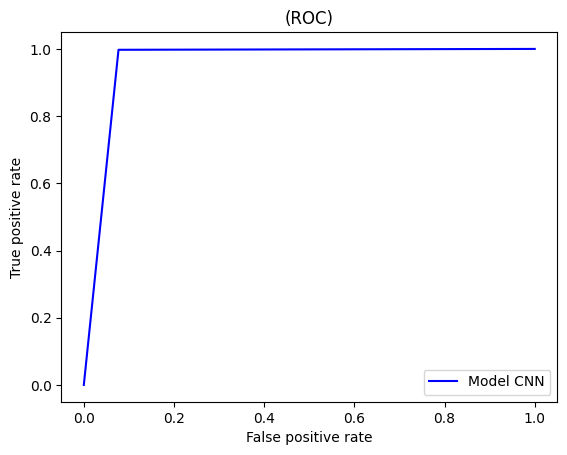

In [85]:
plt.plot(fpr, tpr, linestyle="-", color="blue", label="Model CNN")

plt.title("(ROC)")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="best")
plt.show()

GRAD-CAM

In [115]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input, decode_predictions


orig=cv2.imread("/content/drive/MyDrive/train/NORMAL/IM-0143-0001.jpeg")
resized=cv2.resize(orig,(220,220))
image=load_img("/content/drive/MyDrive/train/NORMAL/IM-0143-0001.jpeg",target_size=(220,220))
image=img_to_array(image)
image=np.expand_dims(image,axis=0)
